# 1. Comparing classifiers. 

## 1. Part One (Divorce classification/prediction).

This dataset is about participants who completed the personal information form and a divorce predictors scale. The data is a modified version of the publicly available at https://archive.ics.uci.
edu/ml/datasets/Divorce+Predictors+data+set (by injecting noise so you will not get the exactly
same results as on UCI website). The dataset marriage.csv is contained in the homework folder.
There are 170 participants and 54 attributes (or predictor variables) that are all real-valued. The last
column of the CSV file is label y (1 means “divorce”, 0 means “no divorce”). Each column is for one
feature (predictor variable), and each row is a sample (participant). A detailed explanation for each
feature (predictor variable) can be found at the website link above. Our goal is to build a classifier
using training data, such that given a test sample, we can classify (or essentially predict) whether its
label is 0 (“no divorce”) or 1 (“divorce”).
We are going to compare the following classifiers (Naive Bayes, Logistic Regression, and KNN).
Use the first 80% data for training and the remaining 20% for testing. If you use scikit-learn you can
use train test split to split the dataset.
Remark: Please note that, here, for Naive Bayes, this means that we have to estimate the variance for
each individual feature from training data. When estimating the variance, if the variance is zero to
close to zero (meaning that there is very little variability in the feature), you can set the variance to
be a small number, e.g.,  = 10−3
. We do not want to have include zero or nearly variance in Naive
Bayes. This tip holds for both Part One and Part Two of this question.

**(a) Report testing accuracy for each of the three classifiers. Comment on their performance: which performs the best and make a guess why they perform the best in this setting.**


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.utils.random import sample_without_replacement
from scipy.io import loadmat
from sklearn.metrics import classification_report, multilabel_confusion_matrix, plot_confusion_matrix
import time

In [41]:
data = pd.read_csv("data/marriage.csv", header = None)
data.head()
labels = data.iloc[:,-1:]
data = data.iloc[:,:54]
data.head()
data = np.array(data)
labels = np.array(labels)




In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size = .2, random_state = 11)
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)
ytest = np.array(ytest)

In [43]:
for x in [2, 10, 25, 50]:
    knnmodel = KNeighborsClassifier(n_neighbors=x)
    knnmodel.fit(xtrain, ytrain.ravel())
    print(f"KNN score for {x} clusters: {knnmodel.score(xtest, ytest.ravel())}")


KNN score for 2 clusters: 0.9411764705882353
KNN score for 10 clusters: 0.9411764705882353
KNN score for 25 clusters: 0.9411764705882353
KNN score for 50 clusters: 0.9411764705882353


K-value seems to be unimportant to results.

In [44]:
knnmodel = KNeighborsClassifier(5)
knnmodel.fit(xtrain, ytrain.ravel())
print(f"KNN score: {knnmodel.score(xtest, ytest.ravel())}")

KNN score: 0.9411764705882353


In [45]:
logmodel = LogisticRegression()
logmodel.fit(xtrain, ytrain.ravel())
print(f"Logistic Regression score: {logmodel.score(xtest, ytest.ravel())}")

Logistic Regression score: 0.9411764705882353


In [46]:
nbmodel = GaussianNB(var_smoothing = 1e-3)
nbmodel.fit(xtrain, ytrain.ravel())
print(f"Naive Bayes score: {nbmodel.score(xtest, ytest.ravel())}")

Naive Bayes score: 0.9411764705882353


All three classifiers perform the same. Becausre of this, I would predict this data is pretty easily separable, albeit with some degree of noise, so the classifiers all work well enough to get the same results. In other words, we don't ahve to draw tight/precise boudaries to get accurate classification with this data. We might be able to visualize that in the next quesiton with PCA.

**(b) Now perform PCA to project the data into two-dimensional space. Build the classifiers
(Naive Bayes, Logistic Regression, and KNN) using the two-dimensional PCA results. Plot
the data points and decision boundary of each classifier in the two-dimensional space. Comment
on the difference between the decision boundary for the three classifiers. Please clearly represent
the data points with different labels using different colors.**

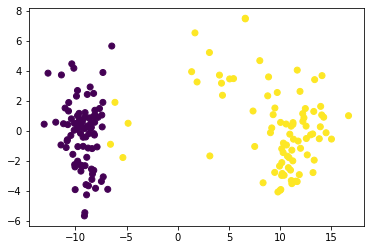

In [47]:
pca = PCA(n_components = 2)
pca.fit(data)
projection = pca.fit_transform(data)
plt.scatter(projection[:,0], projection[:,1], c = labels)

In the PCA projection of the data, we see that the two groups have a huge gap betwen them, with 4 noisy points that will lower accuracy. We suspected this when our models are scored the same in the previous question.

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(projection, labels, test_size = .2, random_state = 11)
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)
ytest = np.array(ytest)

### create mesh grid
h = .02

x_min, x_max = projection[:, 0].min() - 1, projection[:, 0].max() + 1
y_min, y_max = projection[:, 1].min() - 1, projection[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

KNN score: 0.9411764705882353


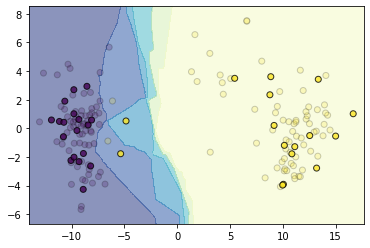

In [49]:
knnmodel = KNeighborsClassifier(5)
knnmodel.fit(xtrain, ytrain.ravel())
print(f"KNN score: {knnmodel.score(xtest, ytest.ravel())}")



if hasattr(knnmodel, "decision_function"):
    Z = knnmodel.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = knnmodel.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap="YlGnBu_r", alpha=.5)

plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain, alpha = .2, edgecolors = "black")
plt.scatter(xtest[:,0], xtest[:,1], c=ytest, alpha = .8, edgecolors = "black")

Logistic Regression score: 1.0


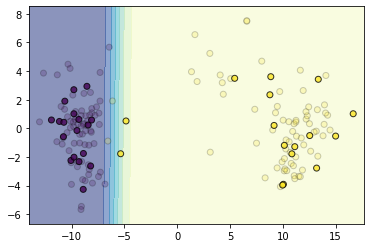

In [50]:
logmodel = LogisticRegression()
logmodel.fit(xtrain, ytrain.ravel())
print(f"Logistic Regression score: {logmodel.score(xtest, ytest.ravel())}")

if hasattr(knnmodel, "decision_function"):
    Z = logmodel.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = logmodel.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap="YlGnBu_r", alpha=.5)

plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain, alpha = .2, edgecolors = "black")
plt.scatter(xtest[:,0], xtest[:,1], c=ytest, alpha = .8, edgecolors = "black")

Naive Bayes score: 0.9411764705882353


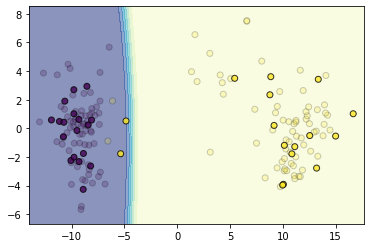

In [51]:
nbmodel = GaussianNB(var_smoothing = 1e-3)
nbmodel.fit(xtrain, ytrain.ravel())
print(f"Naive Bayes score: {nbmodel.score(xtest, ytest.ravel())}")

if hasattr(knnmodel, "decision_function"):
    Z = nbmodel.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = nbmodel.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap="YlGnBu_r", alpha=.5)

plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain, alpha = .2, edgecolors = "black")
plt.scatter(xtest[:,0], xtest[:,1], c=ytest, alpha = .8, edgecolors = "black")

In the three charts above, the different labels are color coded. The train data are faded, while the test data are more opaque. The decision boundaires are plotted in the backgorund, and the areas are filled with the predicted color.

We see that the KNN classfier has the noisiest boundaries, but also comes the closest to correctly classifying the 4 yellow points that are clumped in with the purple points. The log model and naive bayes models have much narrower and straighter decision boundaries. 